-----
# OLS Regression
----

TODO: 

    - Write intro/conc
    - To tidy code and add comments
    - To assess correlation matrix threshold for colinearity
    - Add to plot descriptions/comments

## Set Up
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
sys.path.append('../../src')

from linear_utils import Linear_Model_Builder  

## Data Loading
------

In [3]:
car_df = pd.read_csv('../../data/car_data_processed.csv', index_col = 0)

In [4]:
car_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,peakrpm,citympg,...,is_six_cylinder,is_three_cylinder,is_two_cylinder,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,0,0,0,0,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,...,1,0,0,0,0,0,0,0,1,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,0.787855,-0.186865,...,0,0,0,0,0,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.787855,-1.106241,...,0,0,0,0,0,0,0,0,1,0


### Split independent variables (X) and target variable (y)

In [5]:
my_linear_builder = Linear_Model_Builder(car_df,'price_transformed')

In [6]:
y = my_linear_builder.target

X = my_linear_builder.X

In [7]:
X.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'boreratio', 'stroke', 'compressionratio', 'peakrpm', 'citympg',
       'highwaympg', 'enginesize_transformed', 'horsepower_transformed',
       'symboling_-1', 'symboling_-2', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'is_gas', 'is_turbo', 'has_four_doors',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'is_front_wheel_drive', 'is_rear_wheel_drive',
       'is_front_engine', 'enginetype_dohc', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'is_eight_cylinder', 'is_five_cylinder', 'is_four_cylinder',
       'is_six_cylinder', 'is_three_cylinder', 'is_two_cylinder',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi'],
      dtype='object')

## Check Assumption 1
-----
**Assumption 1:**
A linear relationship between X (independent variable/s) and y (dependent variable)

IF NOT THEN MODEL NOT BE GOOD FIT AND ANY ESTIAMTES WOULD NOT BE MEANINGFUL

In [8]:
X.shape


(204, 48)

### First sepearte out dummy varirables from non-dummy variables TO REDO VODE

In [9]:
dummy_cols = []
non_dummy_cols = []

# Iterate through each column to check unique values
for col in X.columns:
    if X[col].nunique() == 2 and set(X[col].unique()) <= {0, 1}:  # Check if column has exactly two unique values (0 and 1)
        dummy_cols.append(col)
    else:
        non_dummy_cols.append(col)

### Looking at relationship with y for non-dummied vars 

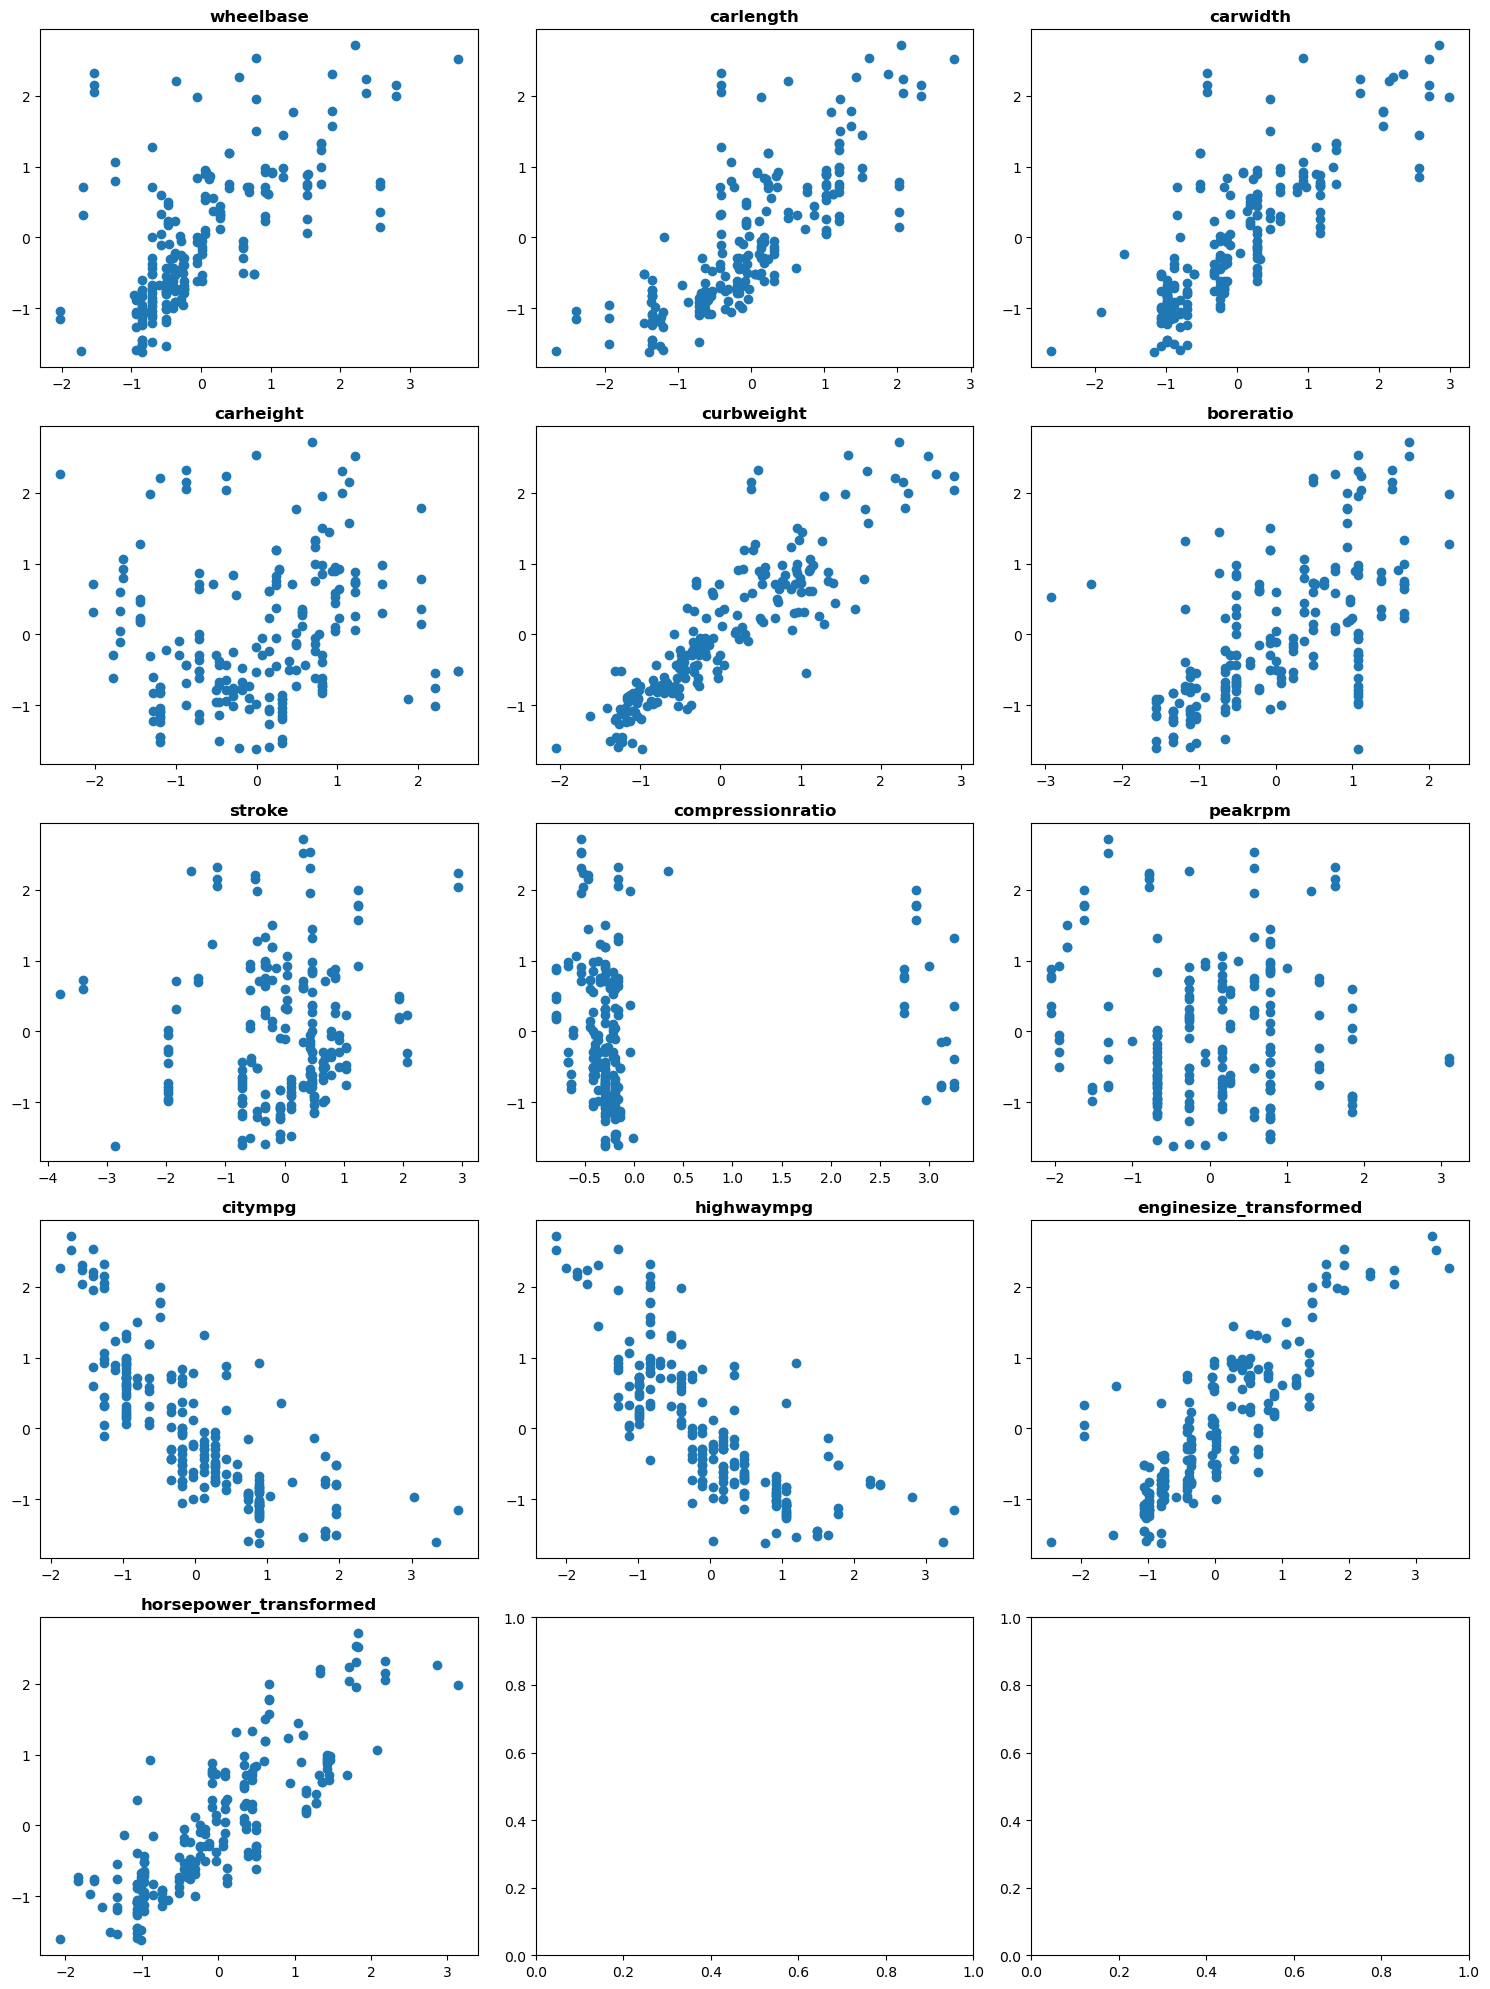

In [10]:
plt.subplots(5,3, figsize=(15,20))

for i,col in enumerate(non_dummy_cols):
    plt.subplot(5,3,i+1)
    plt.scatter(X[col],  y)
    plt.title(col, fontweight= 'bold')
plt.tight_layout()
plt.show()


**Comments:**

- **City MPG/ Highway MPG:**

    Shows a negative correlation to price, as both variables increase the price of the car decreases. This correlation may be due to the split we see between standard and luxury cars. Standard cars tend to a higher fuel efficiency (so more miles per gallon) while luxury cars tend to have a lower fuel efficiency (fewer miles per gallon). Since standard cars are lower in price than luxury cars; this explains why we see a decrease in price as miles per gallon increases.  

- **Compression Ratio:**

    We see no correlation with price but we do see a disitinctive split in the data, as discussed in 02-data-preprocessing notebook this is likely due to the differences between standard and luxury car engines. Therefore, to me it seems important to include in our analysis. 

- **Car Height/ Stroke / Peak RPM:**

    Data for these three variables appears to be rather scattered and random. I assume these variables are not highly predictive for the target variable and will potentially need to be dropped further on in the analysis. 

### Looking at relationship with y for dummied vars 

In [11]:
not_encoded = pd.read_csv('../../data/car_data_not_encoded.csv', index_col=0,
                         )

In [12]:
not_encoded['symboling'] = not_encoded['symboling'].astype(str)

In [13]:
cat_cols = not_encoded.select_dtypes(include='object').columns

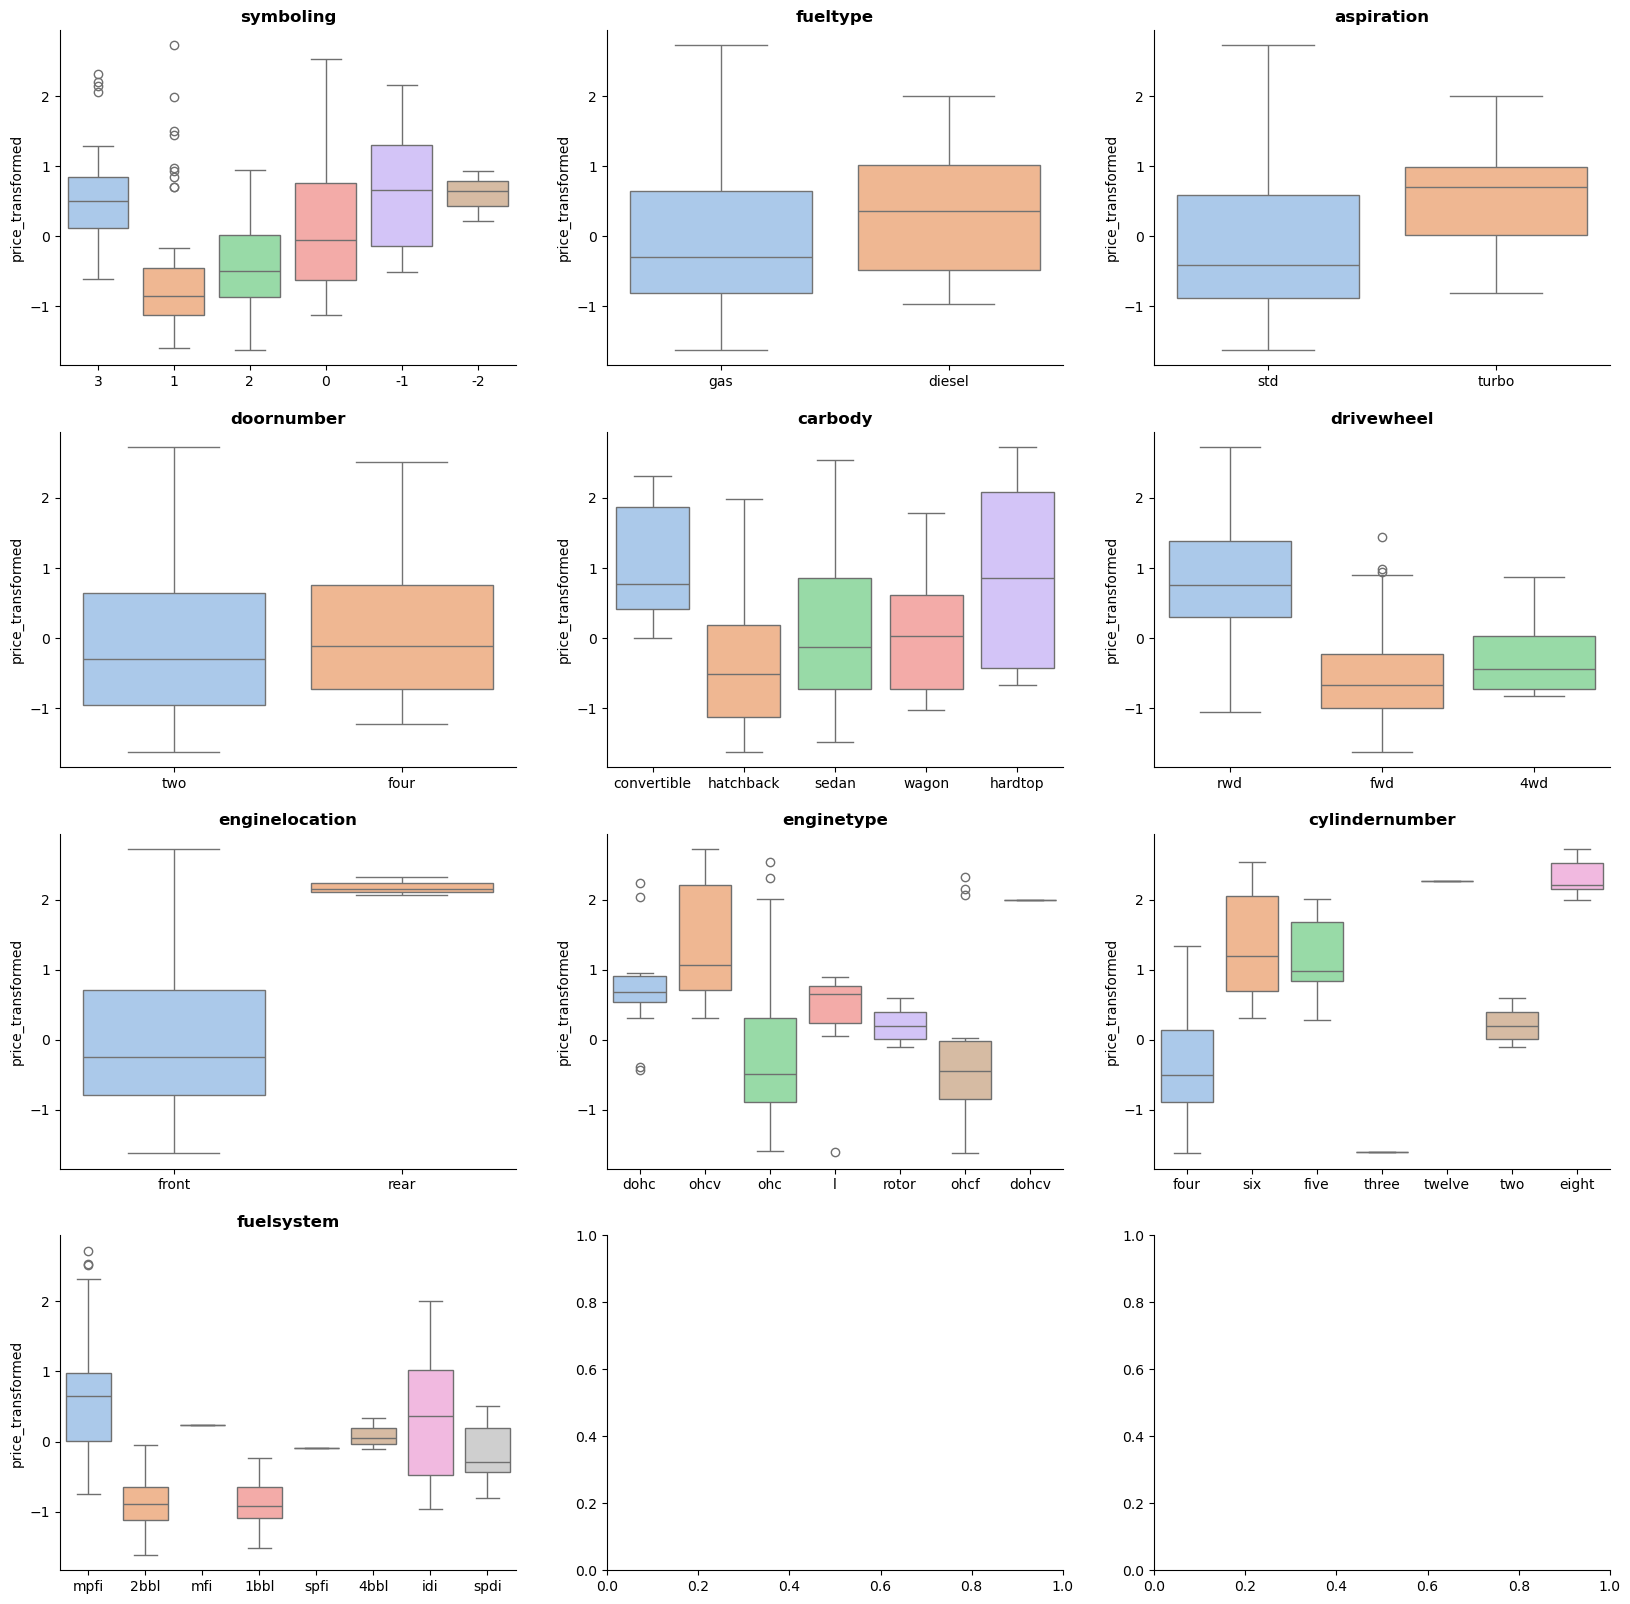

In [14]:
plt.subplots(4,3, figsize=(20,20))

for i,col in enumerate(cat_cols):
    plt.subplot(4,3,i+1)
    sns.boxplot(not_encoded, x =col, y = 'price_transformed', hue = col, palette='pastel')  
    sns.despine()
    plt.xlabel('')
    plt.title(col, fontweight= 'bold')


plt.show()

**Comments:**

- **Door Number:**
    Minimimal difference in median and range of data for both catergories (two/four), this variable may not be very predicitive when in regards to price and may be dropped later in the analysis.

### Checking pearson correlation of y with all independent variables X

In [15]:
car_df.corr()['price_transformed'].sort_values(ascending=False)

price_transformed         1.000000
curbweight                0.890509
enginesize_transformed    0.844800
horsepower_transformed    0.841793
carwidth                  0.801484
carlength                 0.765978
is_rear_wheel_drive       0.682913
wheelbase                 0.627745
boreratio                 0.607432
fuelsystem_mpfi           0.603410
is_six_cylinder           0.472795
is_eight_cylinder         0.367203
enginetype_ohcv           0.353111
is_five_cylinder          0.279536
is_turbo                  0.255697
symboling_3               0.243482
symboling_-1              0.216166
carbody_convertible       0.184792
enginetype_dohc           0.184614
carbody_hardtop           0.175563
carheight                 0.156282
carbody_sedan             0.138528
fuelsystem_idi            0.131179
symboling_0               0.108332
stroke                    0.097867
enginetype_l              0.094216
has_four_doors            0.092468
compressionratio          0.084335
symboling_-2        

## Check Assumption 2
-----

**Assumption 2:**
Independent variables are independent to each other, there is no colinearity or multicollinearity.

/Users/simybasra/anaconda3/envs/stats_models/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


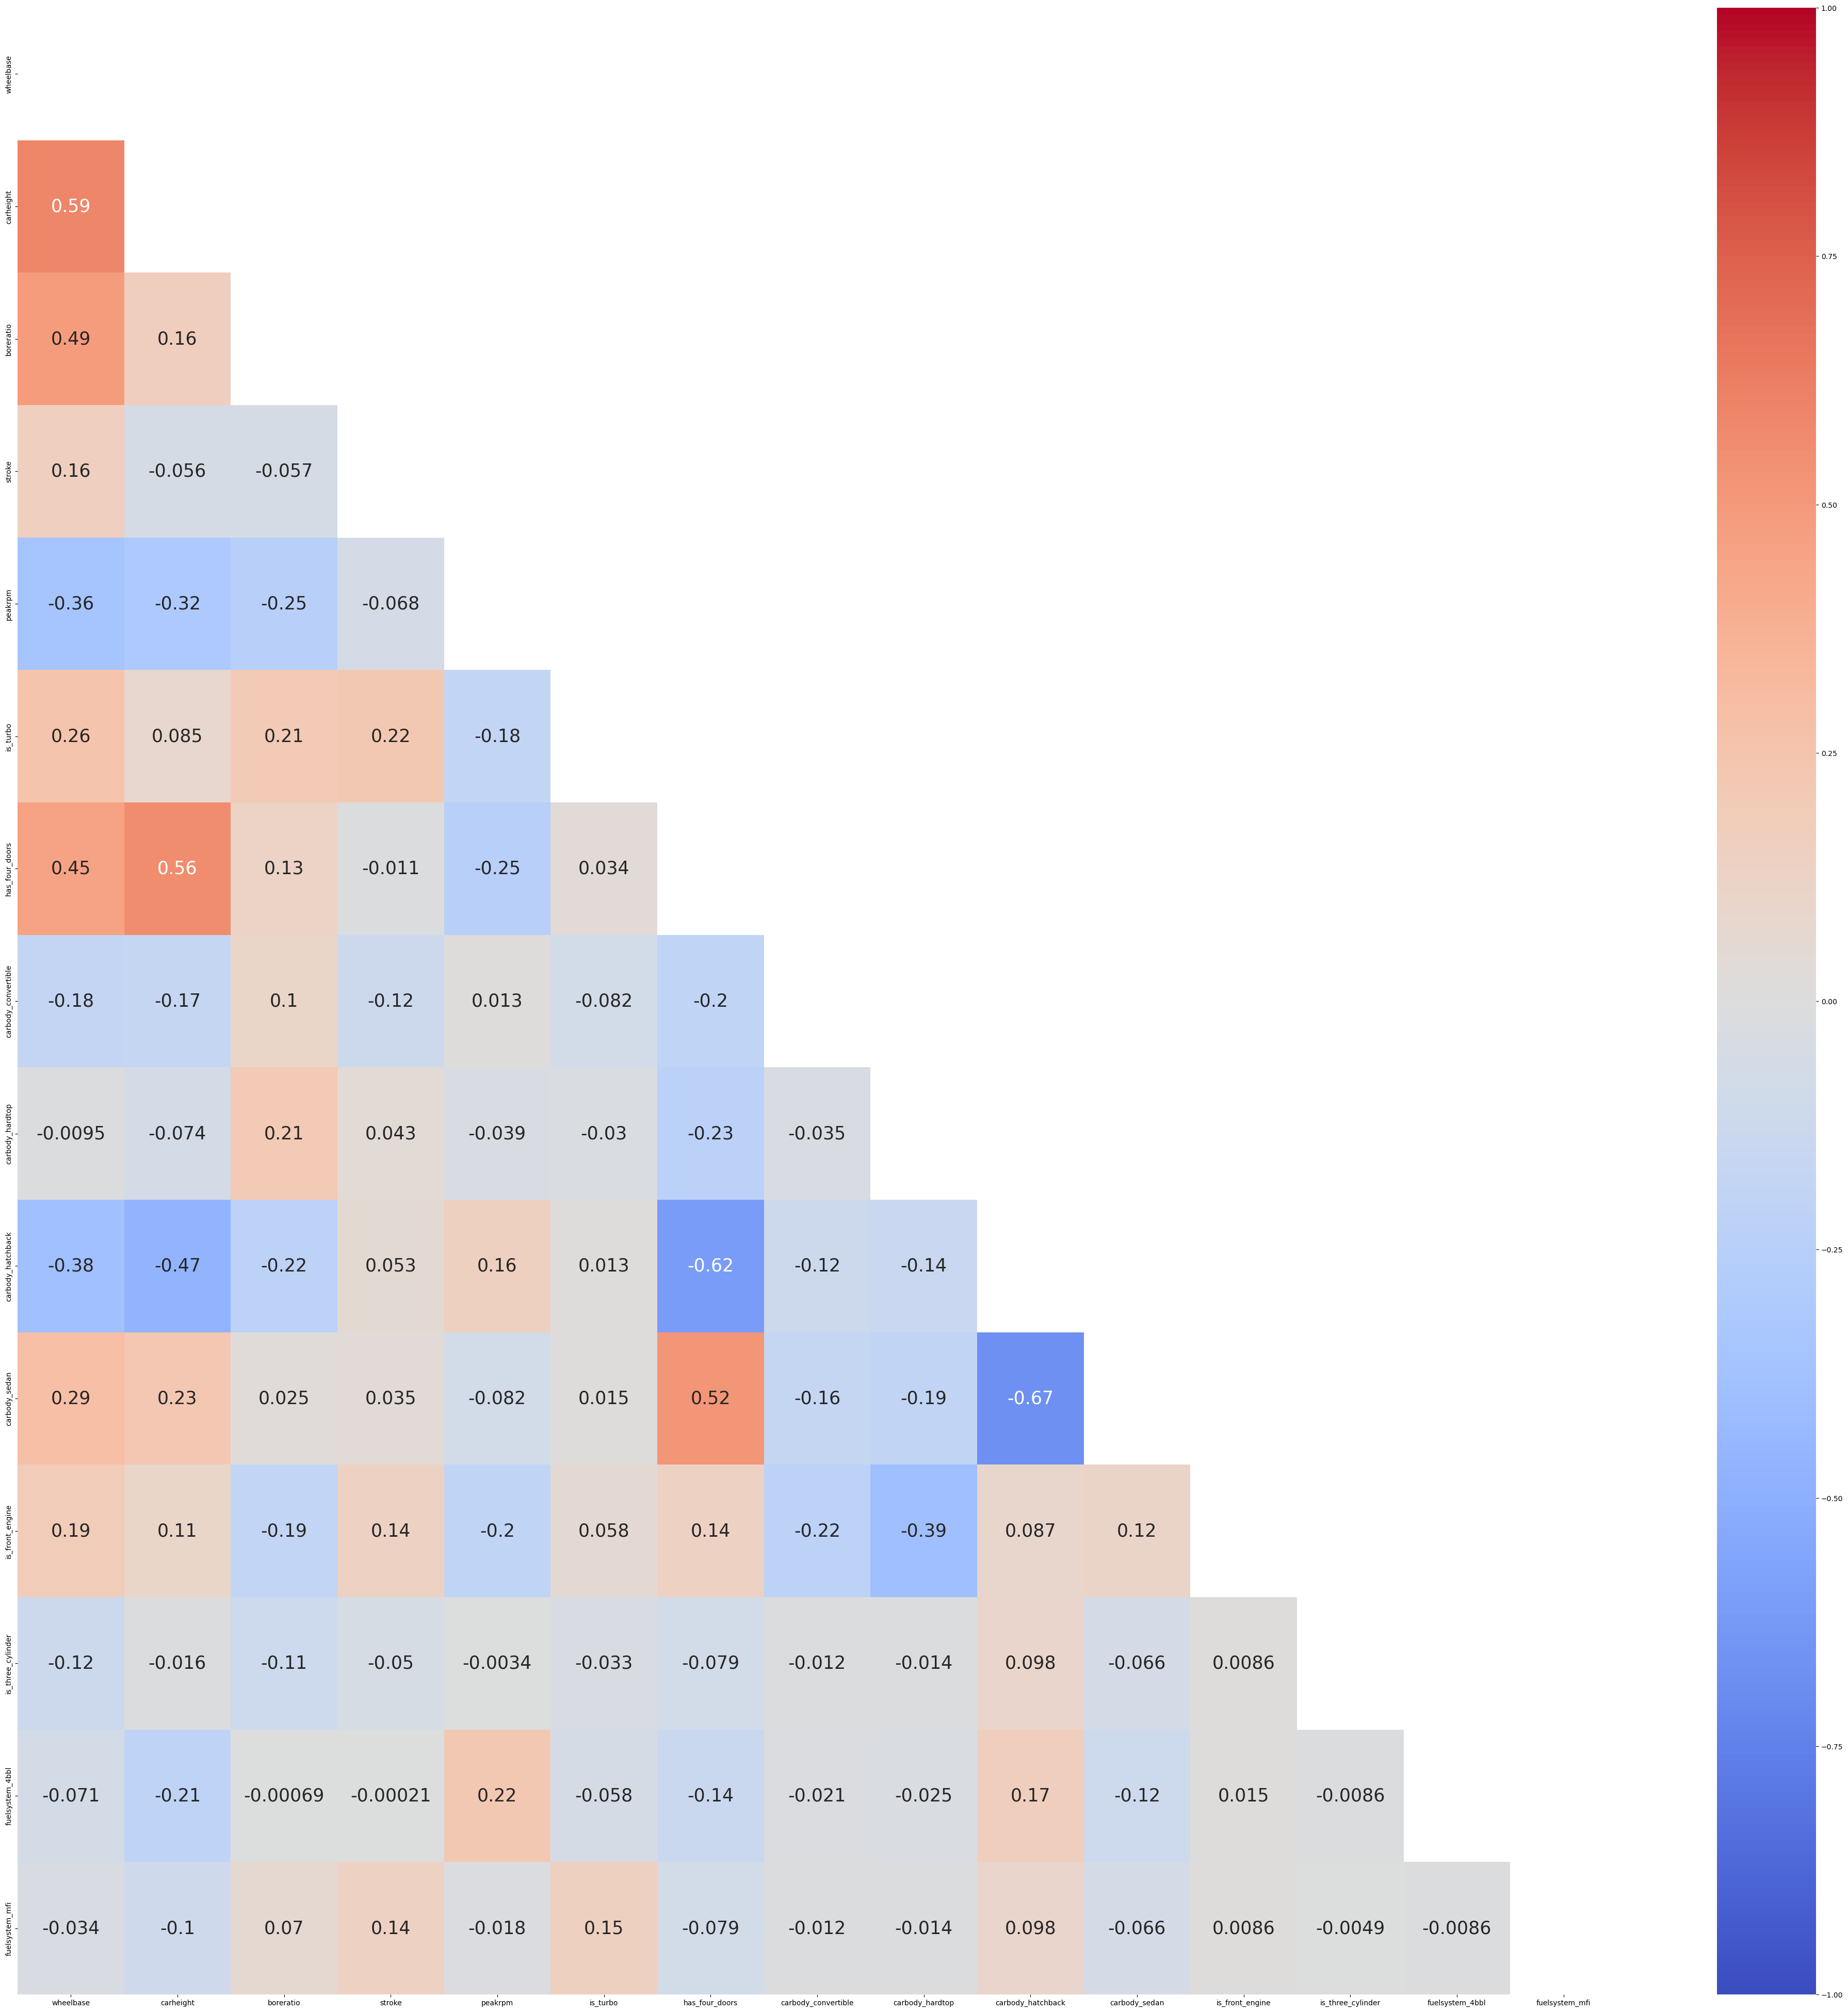

In [16]:
my_linear_builder.get_heatmap(vif_cutoff=10)

Unsure why I am receiving warning see appendix for some investigations.

### Removing variables where correlation is greater than 0.5 one at a time

In [17]:
car_df.corr()['price_transformed'].sort_values(ascending=False)

price_transformed         1.000000
curbweight                0.890509
enginesize_transformed    0.844800
horsepower_transformed    0.841793
carwidth                  0.801484
carlength                 0.765978
is_rear_wheel_drive       0.682913
wheelbase                 0.627745
boreratio                 0.607432
fuelsystem_mpfi           0.603410
is_six_cylinder           0.472795
is_eight_cylinder         0.367203
enginetype_ohcv           0.353111
is_five_cylinder          0.279536
is_turbo                  0.255697
symboling_3               0.243482
symboling_-1              0.216166
carbody_convertible       0.184792
enginetype_dohc           0.184614
carbody_hardtop           0.175563
carheight                 0.156282
carbody_sedan             0.138528
fuelsystem_idi            0.131179
symboling_0               0.108332
stroke                    0.097867
enginetype_l              0.094216
has_four_doors            0.092468
compressionratio          0.084335
symboling_-2        

In [18]:
my_linear_builder.x_modelling(to_drop= ['carbody_sedan'])

,wheelbase,carheight,boreratio,stroke,peakrpm,is_turbo,has_four_doors,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine,is_three_cylinder,fuelsystem_4bbl,fuelsystem_mfi
0,-1.690772,-2.020417,0.519071,-1.839377,-0.262960,0,0,1,0,0,1,0,0,0
1,-1.690772,-2.020417,0.519071,-1.839377,-0.262960,0,0,1,0,0,1,0,0,0
2,-0.708596,-0.543527,-2.404880,0.685946,-0.262960,0,0,0,0,1,1,0,0,0
3,0.173698,0.235942,-0.517266,0.462183,0.787855,0,1,0,0,0,1,0,0,0
4,0.107110,0.235942,-0.517266,0.462183,0.787855,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,0.728239,1.666445,-0.336970,0.577692,0,1,0,0,0,1,0,0,0
201,1.721873,0.728239,1.666445,-0.336970,0.367529,1,1,0,0,0,1,0,0,0
202,1.721873,0.728239,0.926204,-1.232021,0.787855,0,1,0,0,0,1,0,0,0
203,1.721873,0.728239,-1.183483,0.462183,-0.683286,1,1,0,0,0,1,0,0,0


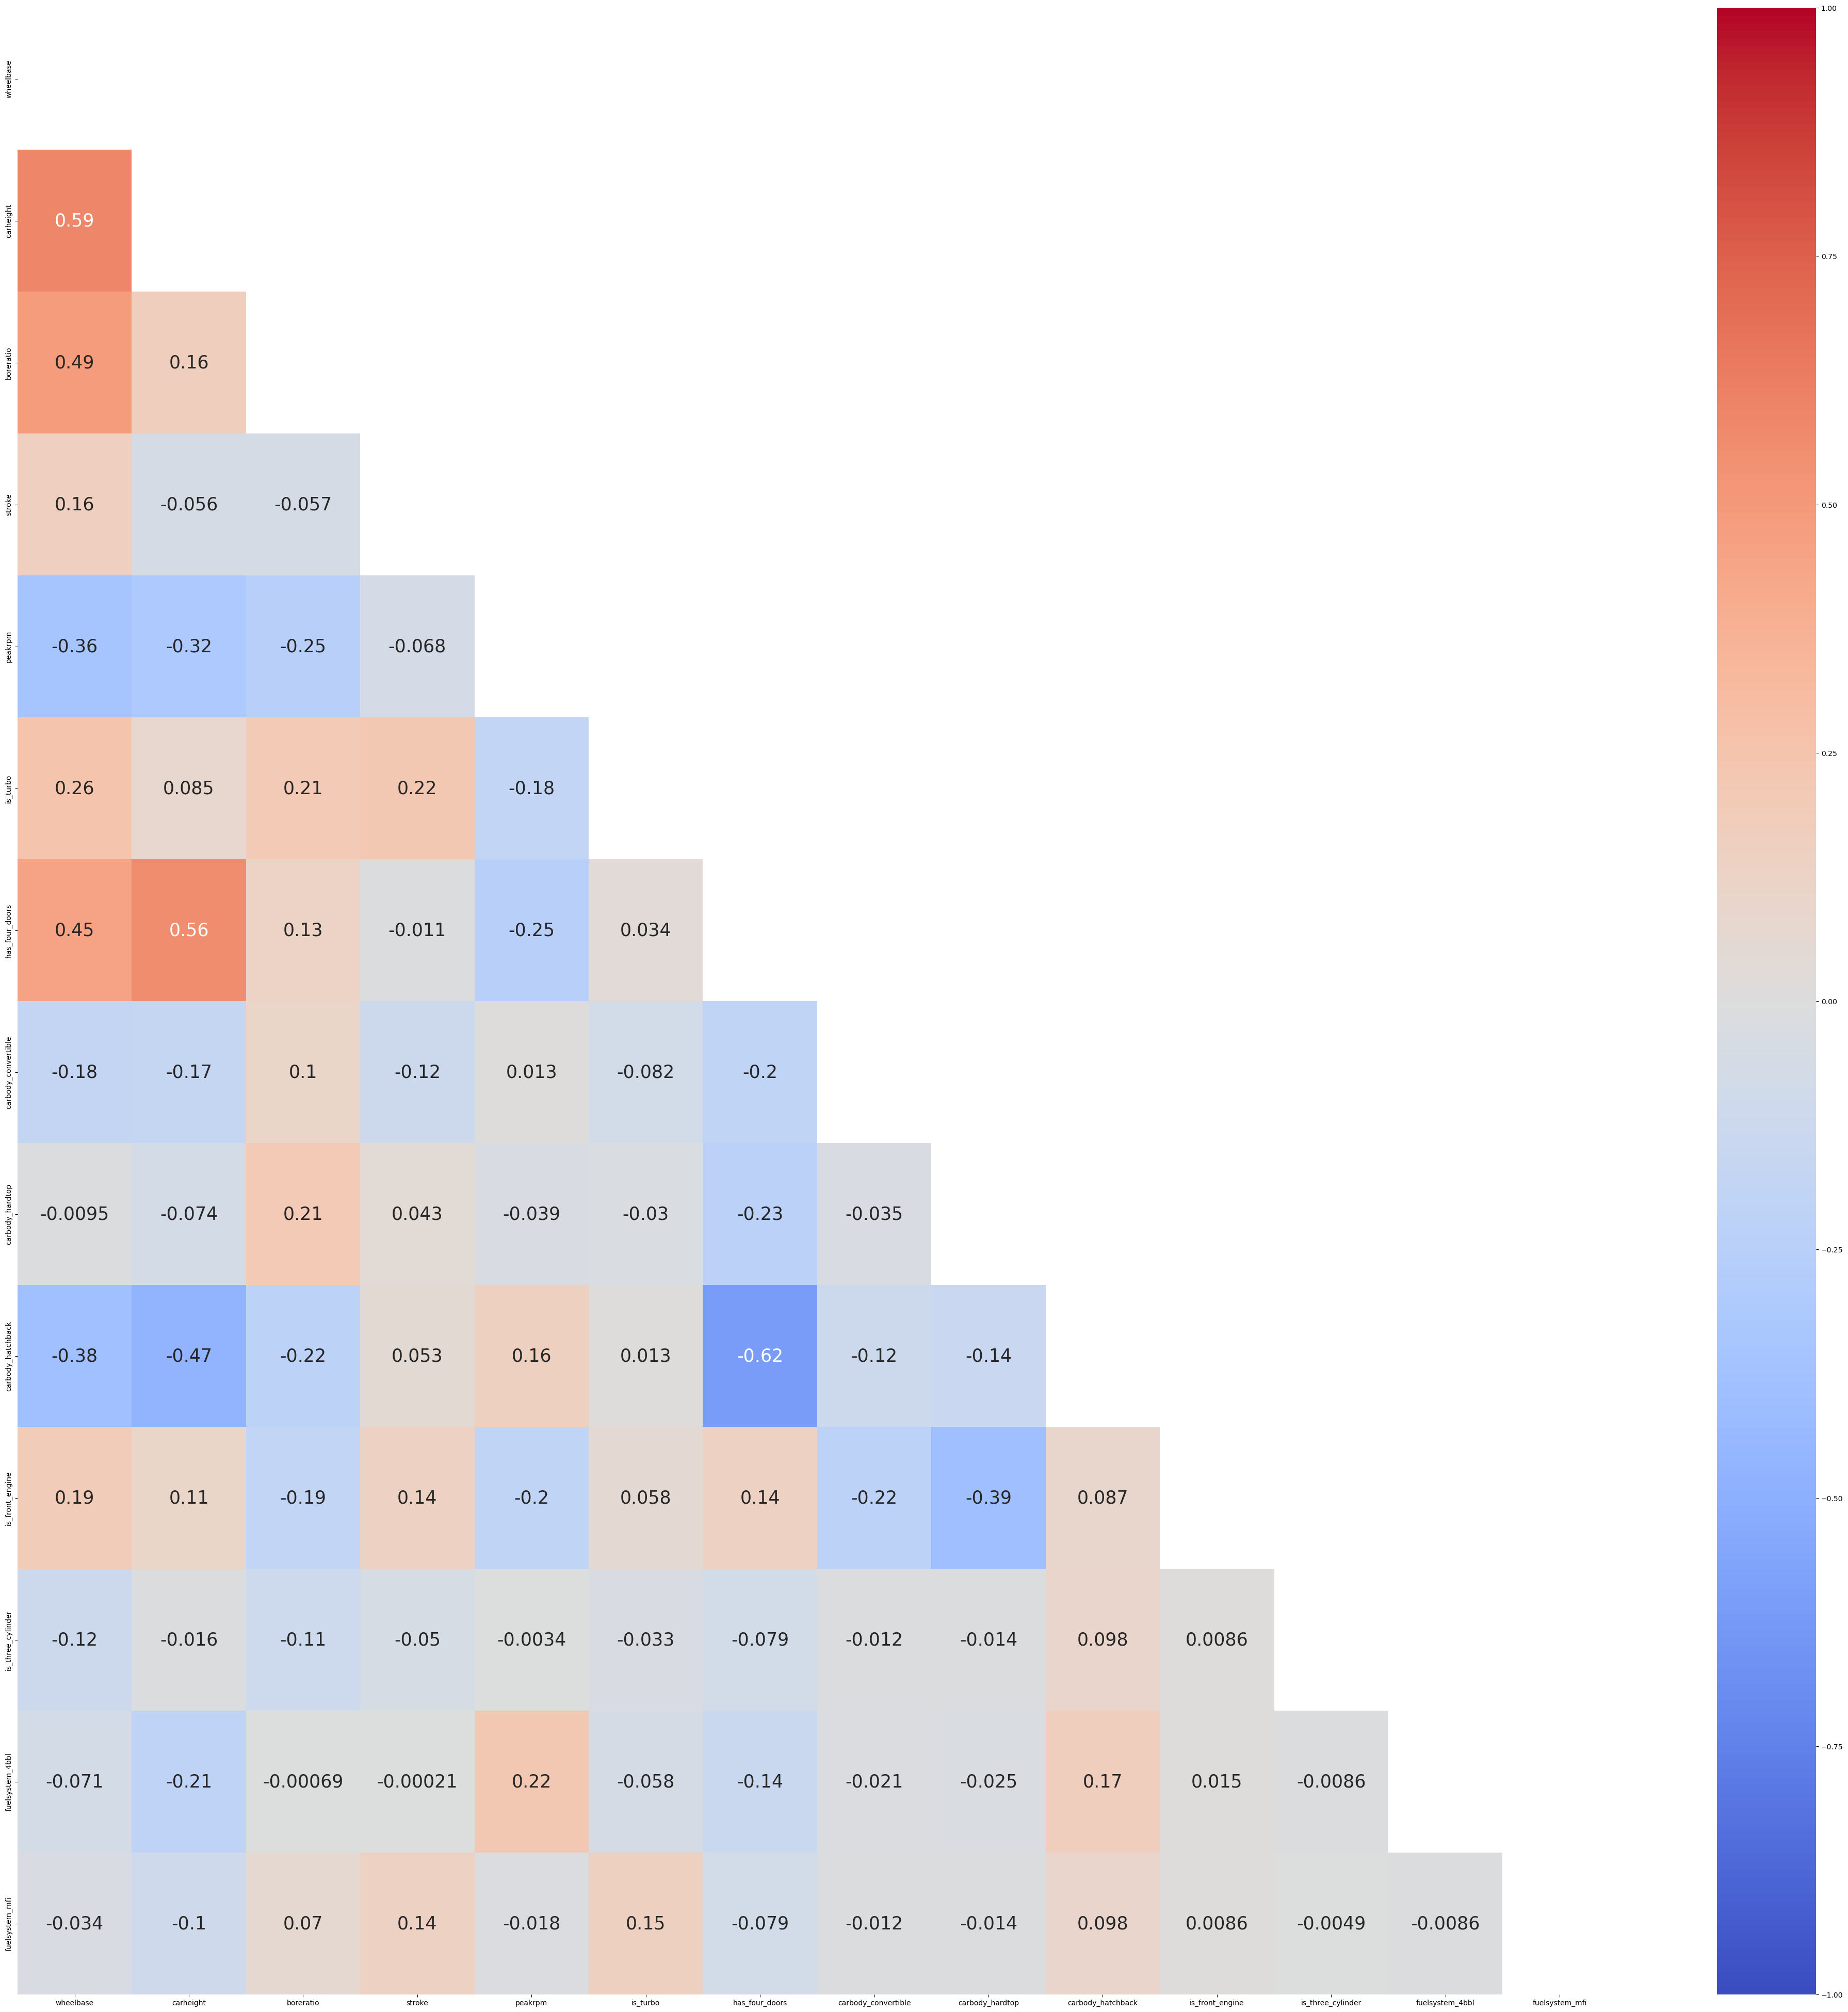

In [19]:
my_linear_builder.get_heatmap(vif_cutoff=10)

In [20]:
my_linear_builder.x_modelling(to_drop= ['has_four_doors'])

,wheelbase,carheight,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine,is_three_cylinder,fuelsystem_4bbl,fuelsystem_mfi
0,-1.690772,-2.020417,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0,0
1,-1.690772,-2.020417,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0,0
2,-0.708596,-0.543527,-2.404880,0.685946,-0.262960,0,0,0,1,1,0,0,0
3,0.173698,0.235942,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0,0
4,0.107110,0.235942,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,0.728239,1.666445,-0.336970,0.577692,0,0,0,0,1,0,0,0
201,1.721873,0.728239,1.666445,-0.336970,0.367529,1,0,0,0,1,0,0,0
202,1.721873,0.728239,0.926204,-1.232021,0.787855,0,0,0,0,1,0,0,0
203,1.721873,0.728239,-1.183483,0.462183,-0.683286,1,0,0,0,1,0,0,0


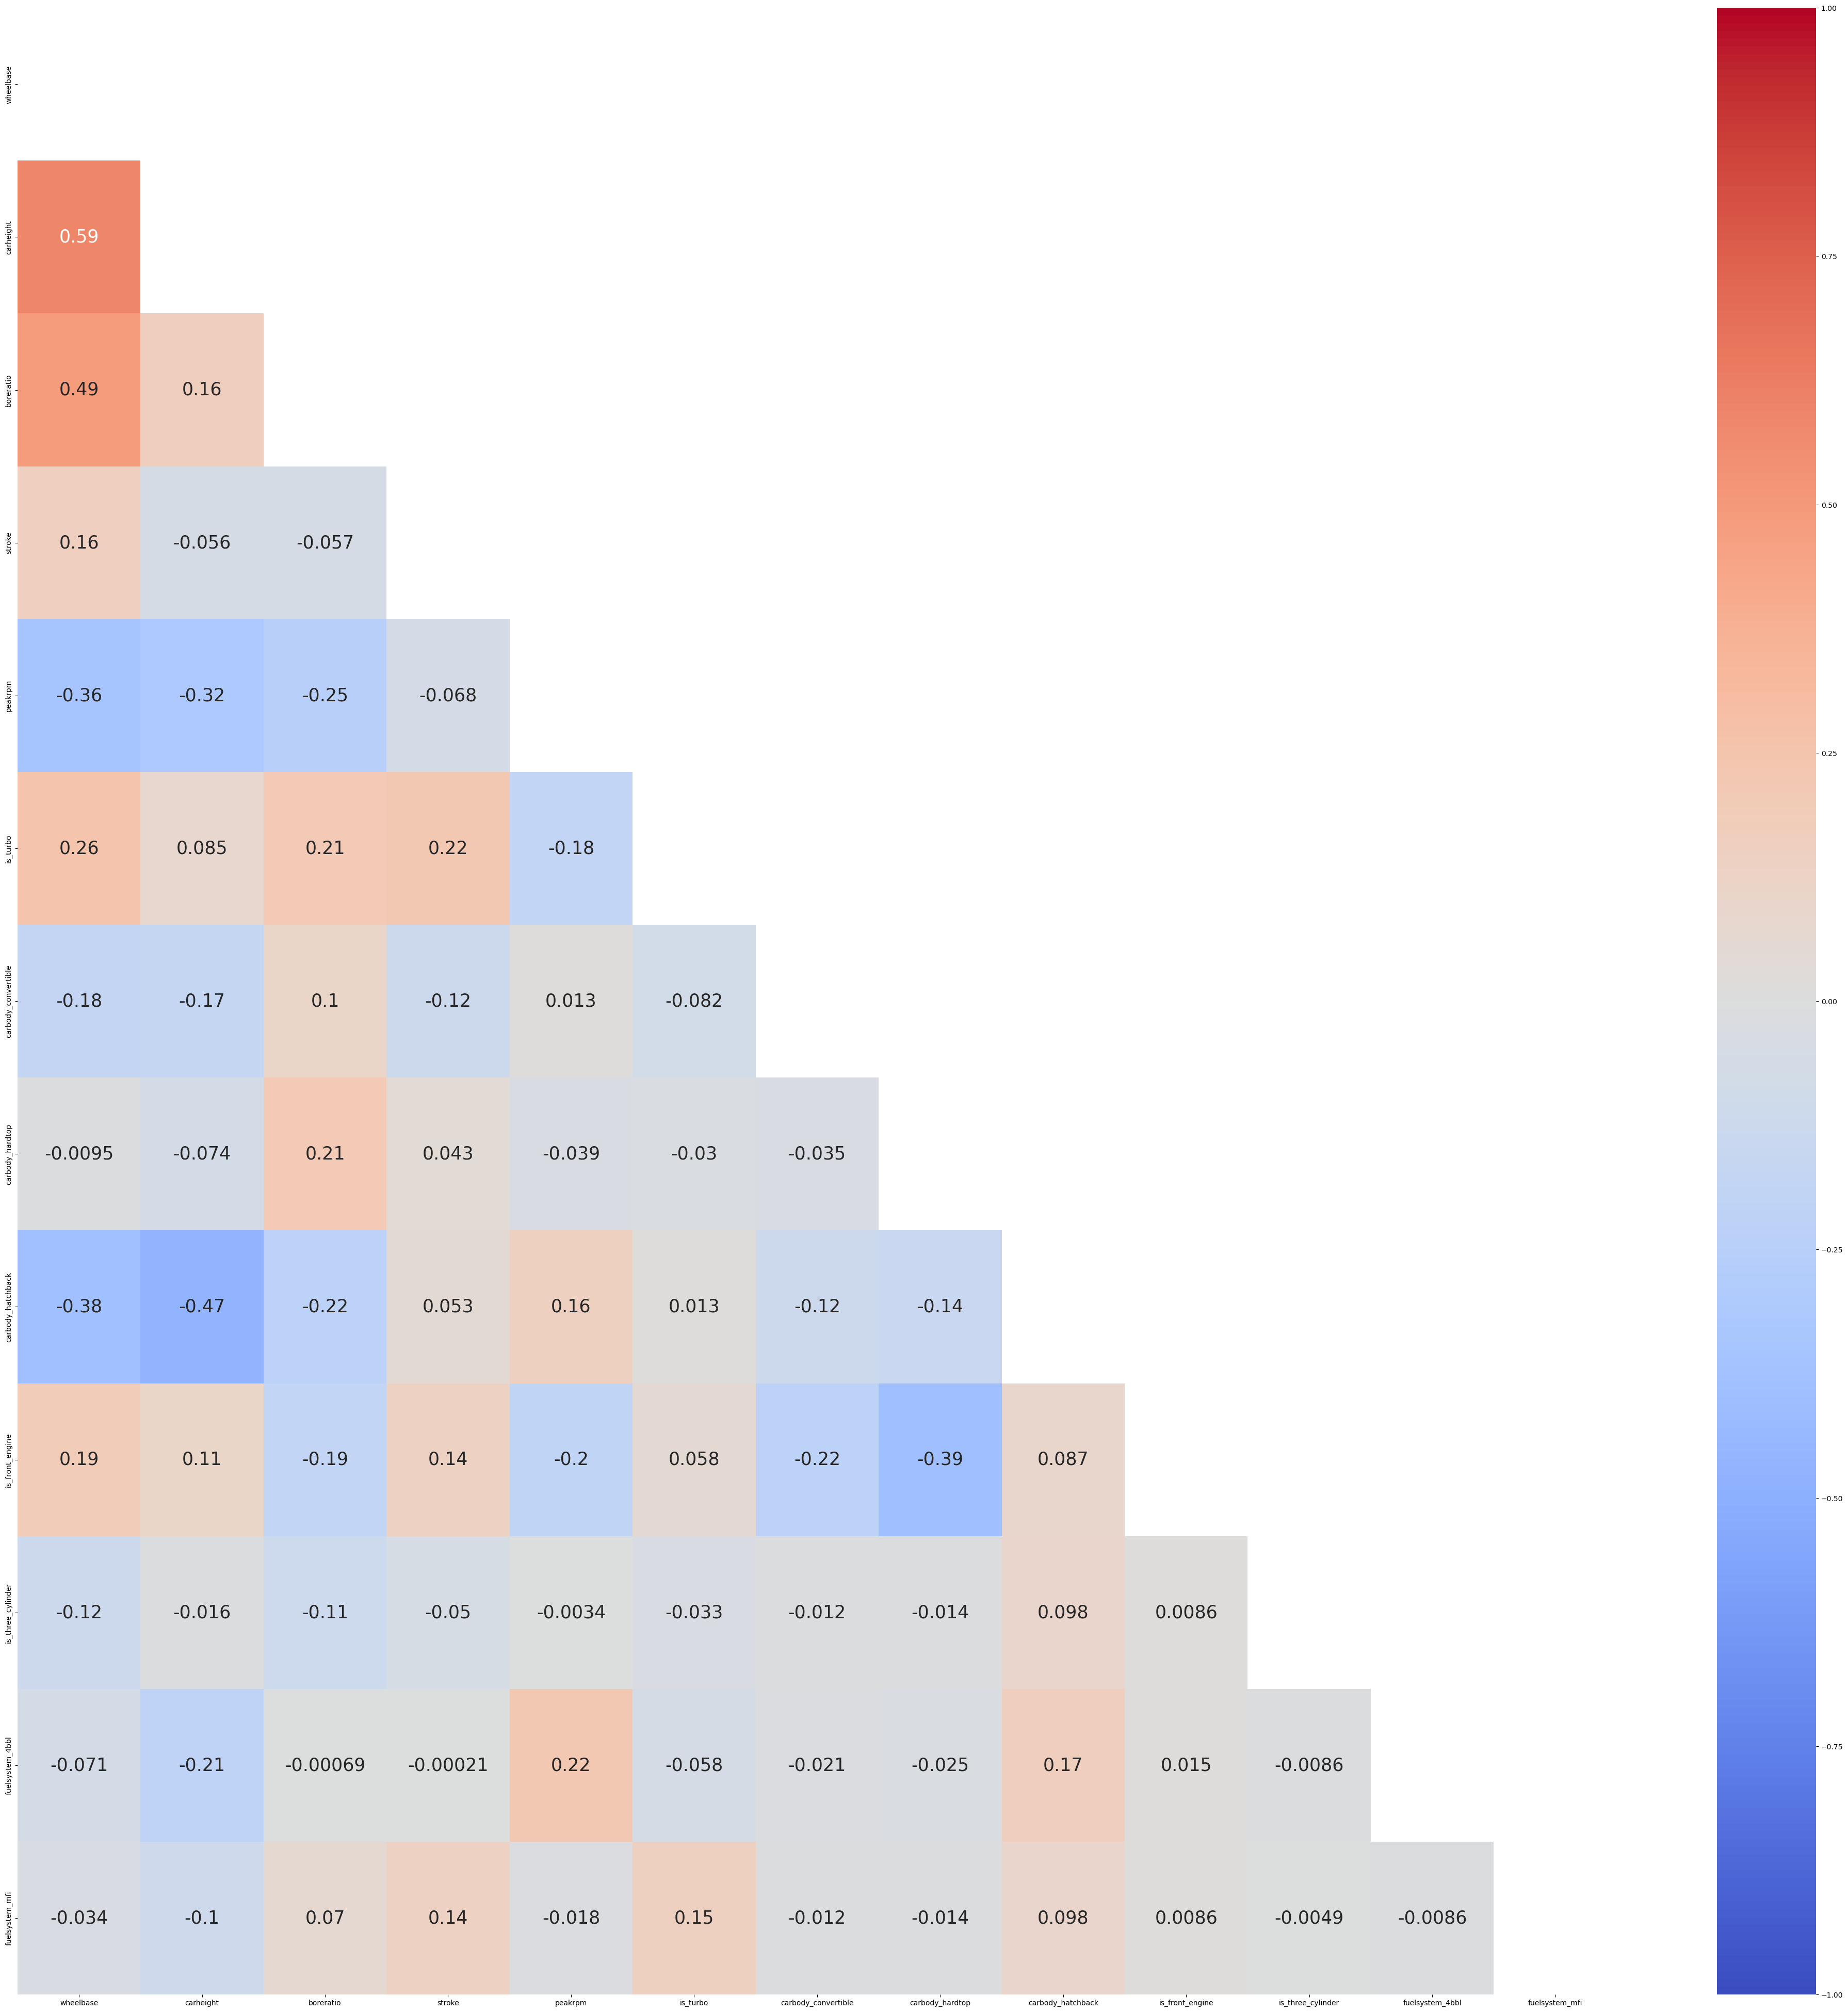

In [21]:
my_linear_builder.get_heatmap(vif_cutoff=10)

In [22]:
my_linear_builder.x_modelling(to_drop= ['carheight'])

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine,is_three_cylinder,fuelsystem_4bbl,fuelsystem_mfi
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0,0
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0,0
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,0,1,1,0,0,0
3,0.173698,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0,0
4,0.107110,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,0,0,1,0,0,0
201,1.721873,1.666445,-0.336970,0.367529,1,0,0,0,1,0,0,0
202,1.721873,0.926204,-1.232021,0.787855,0,0,0,0,1,0,0,0
203,1.721873,-1.183483,0.462183,-0.683286,1,0,0,0,1,0,0,0


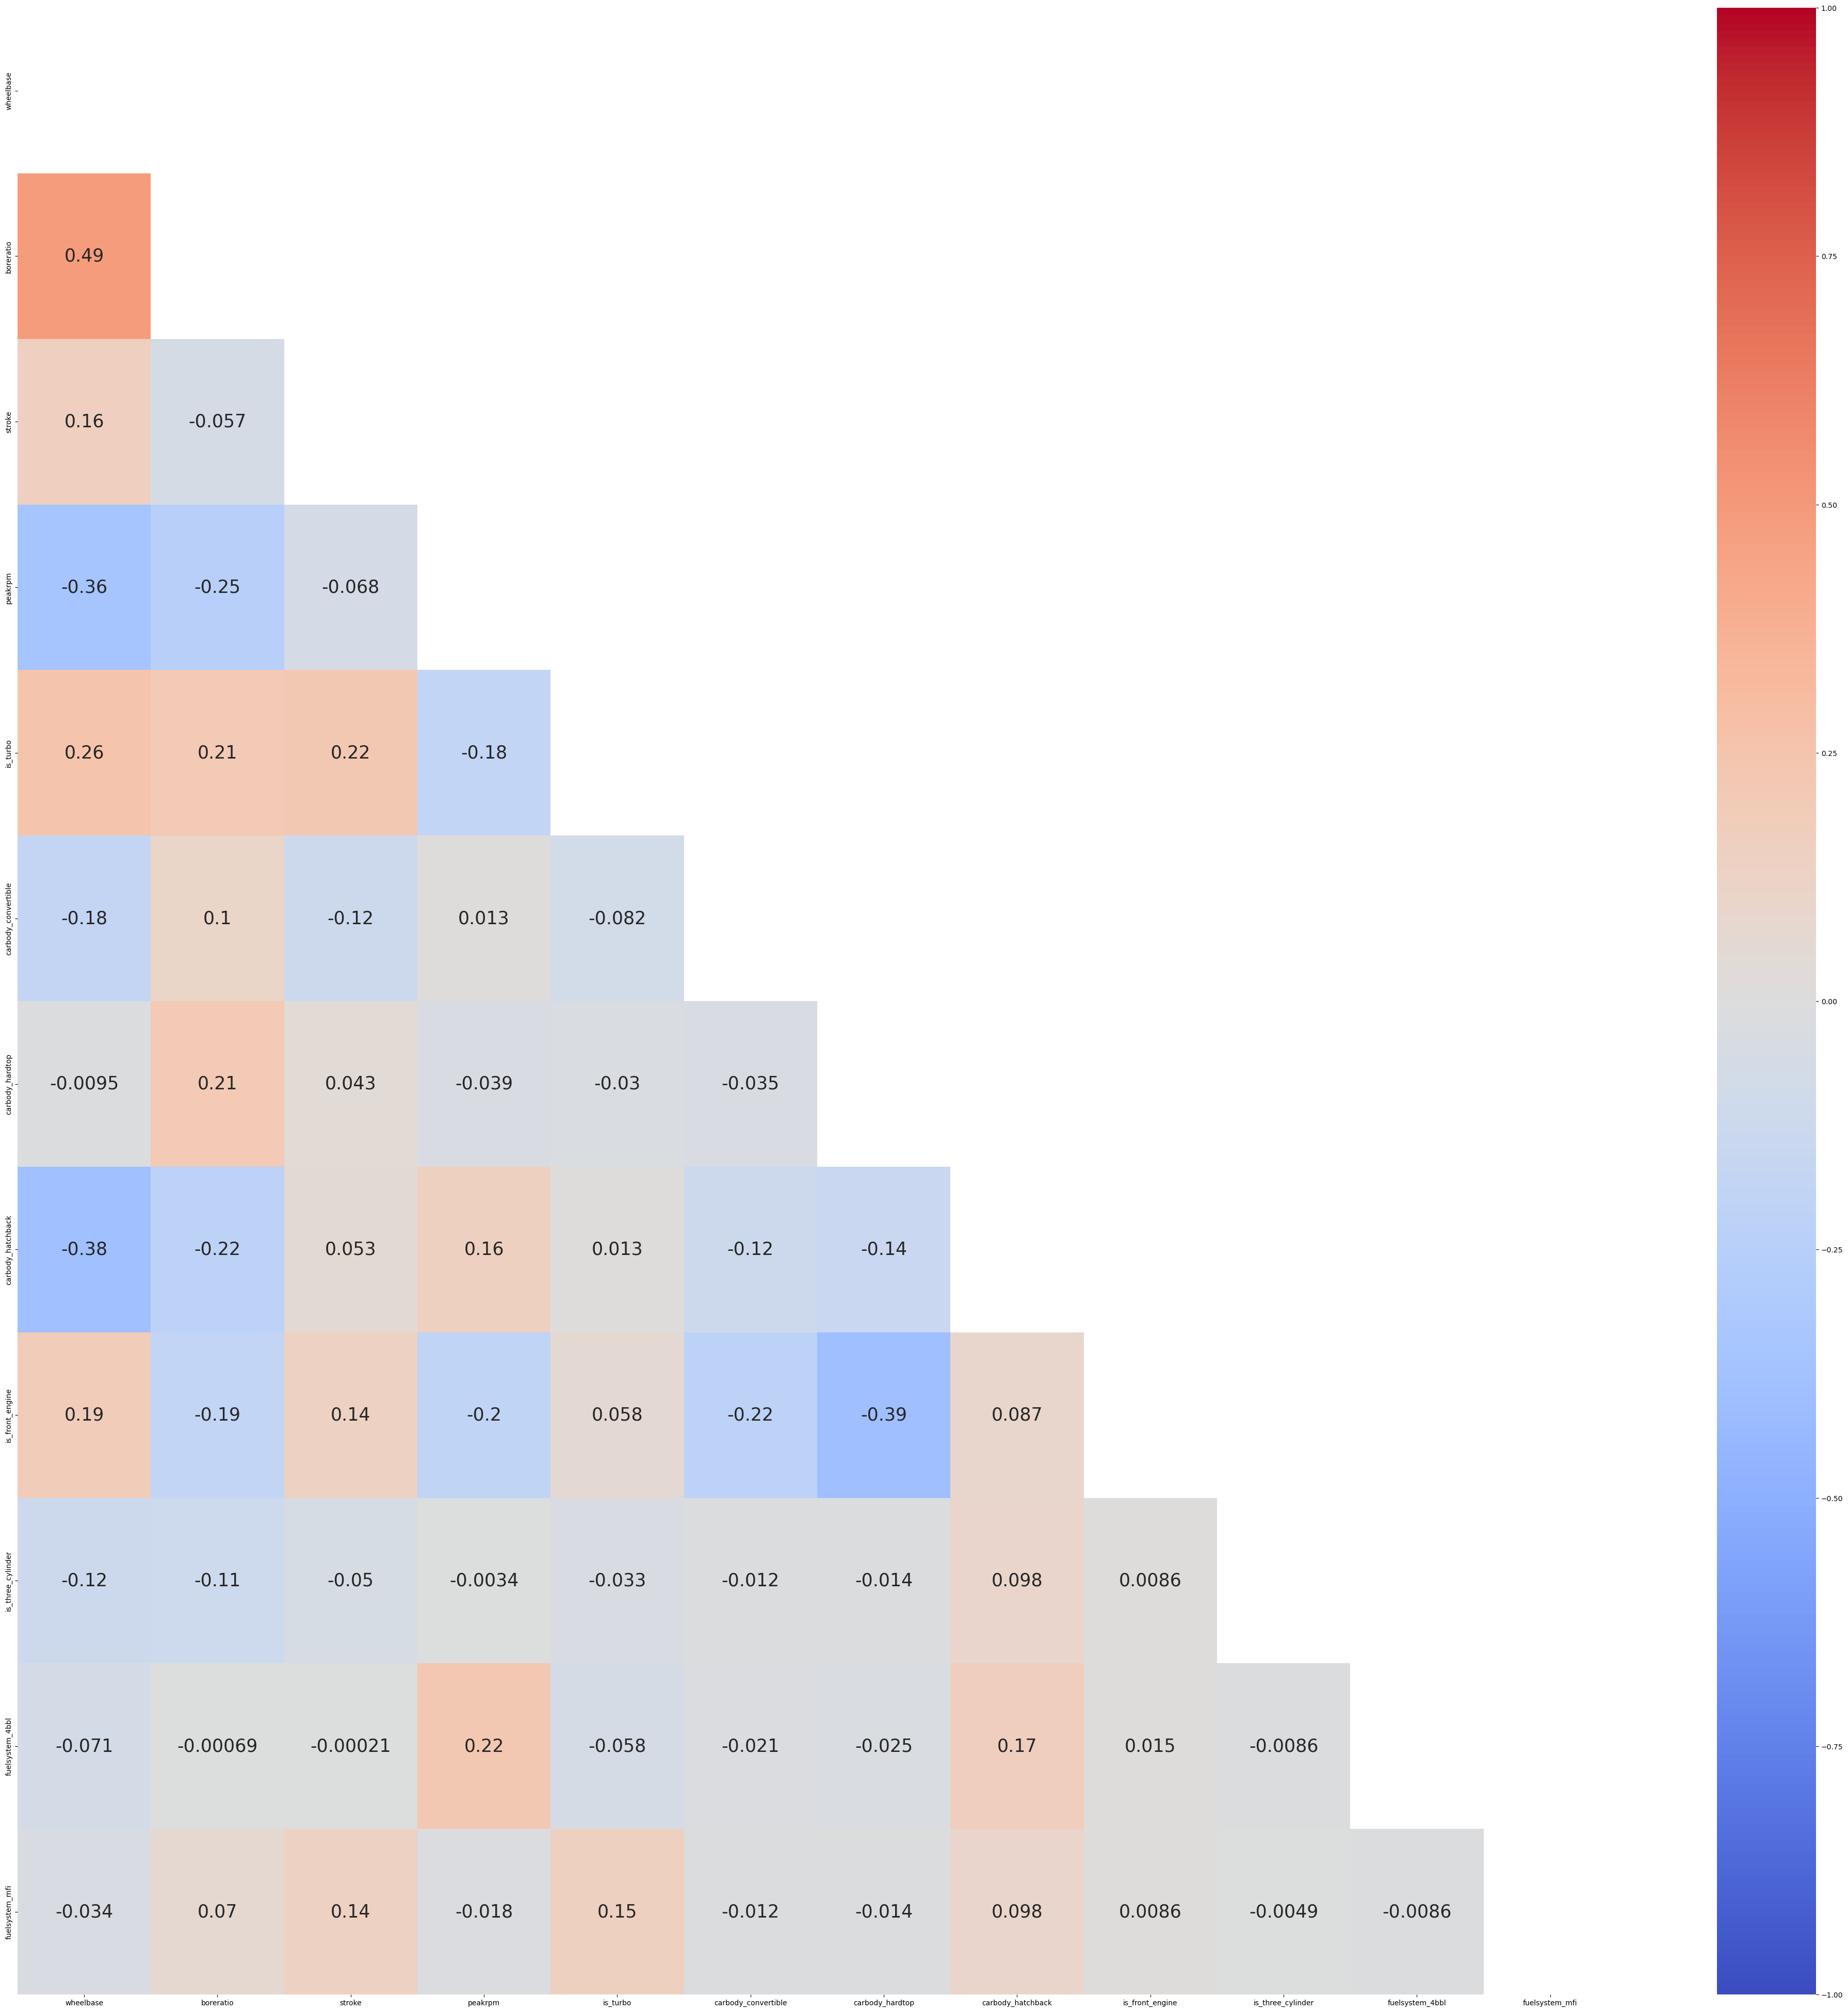

In [23]:
my_linear_builder.get_heatmap(vif_cutoff=10)

Dropped columns:

    - carbody_sedan
    - has_four_doors
    - carheight

Assumptions 1 and 2 are met as well as can be - to continue with rest of the analysis

## Building Linear Regression Stats Model
----

In [24]:
my_linear_builder.X

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine,is_three_cylinder,fuelsystem_4bbl,fuelsystem_mfi
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0,0
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0,0
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,0,1,1,0,0,0
3,0.173698,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0,0
4,0.107110,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,0,0,1,0,0,0
201,1.721873,1.666445,-0.336970,0.367529,1,0,0,0,1,0,0,0
202,1.721873,0.926204,-1.232021,0.787855,0,0,0,0,1,0,0,0
203,1.721873,-1.183483,0.462183,-0.683286,1,0,0,0,1,0,0,0


In [25]:
my_model = my_linear_builder.build_OLS_model()

In [26]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     33.35
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.54e-40
Time:                        20:22:07   Log-Likelihood:                -173.95
No. Observations:                 204   AIC:                             373.9
Df Residuals:                     191   BIC:                             417.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9365      0.413      4.690      0.000       1.122       2.751
wheelbase               0.6411      0.058     10.960      0.000       0.526       0.756
boreratio               0.2479      0.053      4.650      0.000       0.143       0.353
stroke                  0.0568      0.044      1.288      0.199      -0.030       0.144
peakrpm                 0.1644      0.047      3.519      0.001       0.072       0.257
is_turbo                0.2391      0.116      2.066      0.040       0.011       0.467
carbody_convertible     1.4006      0.265      5.280      0.000       0.877       1.924
carbody_hardtop         0.2706      0.242      1.119      0.265      -0.207       0.748
carbody_hatchback       0.0936      0.101      0.930      0.354      -0.105       0.292
is_front_engine        -2.0953      0.412     -5.084      0.000      -2.908      -1.282
is_three_cylinder      -0.0021      0.596     -0.003      0.997      -1.178       1.174
fuelsystem_4bbl         0.2226      0.357      0.624      0.533      -0.481       0.926
fuelsystem_mfi          0.0384      0.607      0.063      0.950      -1.158       1.235
==============================================================================
Omnibus:                       34.830   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.974
Skew:                           0.947   Prob(JB):                     1.90e-12
Kurtosis:                       4.662   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assessing p-values

In [27]:
my_linear_builder.x_modelling(to_drop=['is_three_cylinder'])

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine,fuelsystem_4bbl,fuelsystem_mfi
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0,0
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,0,1,1,0,0
3,0.173698,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0
4,0.107110,-0.517266,0.462183,0.787855,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,0,0,1,0,0
201,1.721873,1.666445,-0.336970,0.367529,1,0,0,0,1,0,0
202,1.721873,0.926204,-1.232021,0.787855,0,0,0,0,1,0,0
203,1.721873,-1.183483,0.462183,-0.683286,1,0,0,0,1,0,0


In [28]:
my_model = my_linear_builder.build_OLS_model()

In [29]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     36.58
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.47e-41
Time:                        20:22:07   Log-Likelihood:                -173.95
No. Observations:                 204   AIC:                             371.9
Df Residuals:                     192   BIC:                             411.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9365      0.412      4.703      0.000       1.124       2.749
wheelbase               0.6411      0.058     11.005      0.000       0.526       0.756
boreratio               0.2479      0.053      4.671      0.000       0.143       0.353
stroke                  0.0568      0.044      1.293      0.198      -0.030       0.144
peakrpm                 0.1644      0.047      3.533      0.001       0.073       0.256
is_turbo                0.2391      0.115      2.071      0.040       0.011       0.467
carbody_convertible     1.4006      0.265      5.295      0.000       0.879       1.922
carbody_hardtop         0.2706      0.241      1.122      0.263      -0.205       0.746
carbody_hatchback       0.0936      0.100      0.934      0.352      -0.104       0.291
is_front_engine        -2.0953      0.411     -5.097      0.000      -2.906      -1.285
fuelsystem_4bbl         0.2226      0.356      0.626      0.532      -0.479       0.924
fuelsystem_mfi          0.0384      0.605      0.063      0.950      -1.155       1.232
==============================================================================
Omnibus:                       34.833   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.981
Skew:                           0.947   Prob(JB):                     1.90e-12
Kurtosis:                       4.662   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
my_linear_builder.x_modelling(to_drop=['fuelsystem_mfi'])

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine,fuelsystem_4bbl
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1,0
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,0,1,1,0
3,0.173698,-0.517266,0.462183,0.787855,0,0,0,0,1,0
4,0.107110,-0.517266,0.462183,0.787855,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,0,0,1,0
201,1.721873,1.666445,-0.336970,0.367529,1,0,0,0,1,0
202,1.721873,0.926204,-1.232021,0.787855,0,0,0,0,1,0
203,1.721873,-1.183483,0.462183,-0.683286,1,0,0,0,1,0


In [31]:
my_model = my_linear_builder.build_OLS_model()

In [32]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     40.44
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           3.78e-42
Time:                        20:22:07   Log-Likelihood:                -173.95
No. Observations:                 204   AIC:                             369.9
Df Residuals:                     193   BIC:                             406.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9362      0.411      4.714      0.000       1.126       2.746
wheelbase               0.6407      0.058     11.087      0.000       0.527       0.755
boreratio               0.2483      0.053      4.724      0.000       0.145       0.352
stroke                  0.0572      0.043      1.317      0.189      -0.028       0.143
peakrpm                 0.1644      0.046      3.542      0.000       0.073       0.256
is_turbo                0.2399      0.114      2.097      0.037       0.014       0.466
carbody_convertible     1.4003      0.264      5.308      0.000       0.880       1.921
carbody_hardtop         0.2701      0.240      1.123      0.263      -0.204       0.744
carbody_hatchback       0.0940      0.100      0.941      0.348      -0.103       0.291
is_front_engine        -2.0950      0.410     -5.110      0.000      -2.904      -1.286
fuelsystem_4bbl         0.2221      0.355      0.626      0.532      -0.477       0.922
==============================================================================
Omnibus:                       34.813   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.943
Skew:                           0.947   Prob(JB):                     1.93e-12
Kurtosis:                       4.662   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
my_linear_builder.x_modelling(to_drop=['fuelsystem_4bbl'])

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,is_front_engine
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,0,1
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,0,1,1
3,0.173698,-0.517266,0.462183,0.787855,0,0,0,0,1
4,0.107110,-0.517266,0.462183,0.787855,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,0,0,1
201,1.721873,1.666445,-0.336970,0.367529,1,0,0,0,1
202,1.721873,0.926204,-1.232021,0.787855,0,0,0,0,1
203,1.721873,-1.183483,0.462183,-0.683286,1,0,0,0,1


In [34]:
my_model = my_linear_builder.build_OLS_model()

In [35]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     45.03
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           6.62e-43
Time:                        20:22:07   Log-Likelihood:                -174.16
No. Observations:                 204   AIC:                             368.3
Df Residuals:                     194   BIC:                             401.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9216      0.409      4.694      0.000       1.114       2.729
wheelbase               0.6414      0.058     11.118      0.000       0.528       0.755
boreratio               0.2511      0.052      4.802      0.000       0.148       0.354
stroke                  0.0575      0.043      1.326      0.186      -0.028       0.143
peakrpm                 0.1709      0.045      3.781      0.000       0.082       0.260
is_turbo                0.2364      0.114      2.072      0.040       0.011       0.461
carbody_convertible     1.4007      0.263      5.318      0.000       0.881       1.920
carbody_hardtop         0.2718      0.240      1.132      0.259      -0.202       0.745
carbody_hatchback       0.1031      0.099      1.046      0.297      -0.091       0.298
is_front_engine        -2.0794      0.409     -5.090      0.000      -2.885      -1.274
==============================================================================
Omnibus:                       33.834   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.624
Skew:                           0.930   Prob(JB):                     6.17e-12
Kurtosis:                       4.616   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
my_linear_builder.x_modelling(to_drop=['carbody_hatchback'])

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,carbody_hardtop,is_front_engine
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,1
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,0,1
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,0,1
3,0.173698,-0.517266,0.462183,0.787855,0,0,0,1
4,0.107110,-0.517266,0.462183,0.787855,0,0,0,1
...,...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,0,1
201,1.721873,1.666445,-0.336970,0.367529,1,0,0,1
202,1.721873,0.926204,-1.232021,0.787855,0,0,0,1
203,1.721873,-1.183483,0.462183,-0.683286,1,0,0,1


In [37]:
my_model = my_linear_builder.build_OLS_model()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     50.50
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.54e-43
Time:                        20:22:07   Log-Likelihood:                -174.73
No. Observations:                 204   AIC:                             367.5
Df Residuals:                     195   BIC:                             397.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.9215      0.410      4.692      0.000       1.114       2.729
wheelbase               0.6170      0.053     11.687      0.000       0.513       0.721
boreratio               0.2552      0.052      4.893      0.000       0.152       0.358
stroke                  0.0620      0.043      1.437      0.152      -0.023       0.147
peakrpm                 0.1725      0.045      3.819      0.000       0.083       0.262
is_turbo                0.2471      0.114      2.173      0.031       0.023       0.471
carbody_convertible     1.3462      0.258      5.213      0.000       0.837       1.856
carbody_hardtop         0.2372      0.238      0.997      0.320      -0.232       0.706
is_front_engine        -2.0428      0.407     -5.017      0.000      -2.846      -1.240
==============================================================================
Omnibus:                       35.949   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.861
Skew:                           0.974   Prob(JB):                     7.41e-13
Kurtosis:                       4.666   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
my_linear_builder.x_modelling(to_drop=['carbody_hardtop'])

,wheelbase,boreratio,stroke,peakrpm,is_turbo,carbody_convertible,is_front_engine
0,-1.690772,0.519071,-1.839377,-0.262960,0,1,1
1,-1.690772,0.519071,-1.839377,-0.262960,0,1,1
2,-0.708596,-2.404880,0.685946,-0.262960,0,0,1
3,0.173698,-0.517266,0.462183,0.787855,0,0,1
4,0.107110,-0.517266,0.462183,0.787855,0,0,1
...,...,...,...,...,...,...,...
200,1.721873,1.666445,-0.336970,0.577692,0,0,1
201,1.721873,1.666445,-0.336970,0.367529,1,0,1
202,1.721873,0.926204,-1.232021,0.787855,0,0,1
203,1.721873,-1.183483,0.462183,-0.683286,1,0,1


In [39]:
my_model = my_linear_builder.build_OLS_model()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.58
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           3.17e-44
Time:                        20:22:07   Log-Likelihood:                -175.25
No. Observations:                 204   AIC:                             366.5
Df Residuals:                     196   BIC:                             393.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0886      0.374      5.590      0.000       1.352       2.825
wheelbase               0.6131      0.053     11.646      0.000       0.509       0.717
boreratio               0.2638      0.051      5.126      0.000       0.162       0.365
stroke                  0.0674      0.043      1.574      0.117      -0.017       0.152
peakrpm                 0.1675      0.045      3.730      0.000       0.079       0.256
is_turbo                0.2373      0.113      2.096      0.037       0.014       0.461
carbody_convertible     1.3050      0.255      5.119      0.000       0.802       1.808
is_front_engine        -2.2000      0.375     -5.861      0.000      -2.940      -1.460
==============================================================================
Omnibus:                       35.925   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.351
Skew:                           0.979   Prob(JB):                     9.56e-13
Kurtosis:                       4.637   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
my_linear_builder.x_modelling(to_drop=['stroke'])

,wheelbase,boreratio,peakrpm,is_turbo,carbody_convertible,is_front_engine
0,-1.690772,0.519071,-0.262960,0,1,1
1,-1.690772,0.519071,-0.262960,0,1,1
2,-0.708596,-2.404880,-0.262960,0,0,1
3,0.173698,-0.517266,0.787855,0,0,1
4,0.107110,-0.517266,0.787855,0,0,1
...,...,...,...,...,...,...
200,1.721873,1.666445,0.577692,0,0,1
201,1.721873,1.666445,0.367529,1,0,1
202,1.721873,0.926204,0.787855,0,0,1
203,1.721873,-1.183483,-0.683286,1,0,1


In [41]:
my_model = my_linear_builder.build_OLS_model()
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     66.26
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.26e-44
Time:                        20:22:07   Log-Likelihood:                -176.53
No. Observations:                 204   AIC:                             367.1
Df Residuals:                     197   BIC:                             390.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0530      0.374      5.485      0.000       1.315       2.791
wheelbase               0.6248      0.052     11.944      0.000       0.522       0.728
boreratio               0.2522      0.051      4.934      0.000       0.151       0.353
peakrpm                 0.1675      0.045      3.717      0.000       0.079       0.256
is_turbo                0.2738      0.111      2.461      0.015       0.054       0.493
carbody_convertible     1.2887      0.256      5.041      0.000       0.784       1.793
is_front_engine        -2.1701      0.376     -5.767      0.000      -2.912      -1.428
==============================================================================
Omnibus:                       30.981   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.363
Skew:                           0.894   Prob(JB):                     2.33e-10
Kurtosis:                       4.421   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#TODO: ADD COMMENT WHY REMOVED P_VALUES > 0.05!!!

## Stepwise Regression - Top Down Approach
----

### Model 0 - Base model

In [42]:
my_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     66.26
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.26e-44
Time:                        20:22:07   Log-Likelihood:                -176.53
No. Observations:                 204   AIC:                             367.1
Df Residuals:                     197   BIC:                             390.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.0530      0.374      5.485      0.000       1.315       2.791
wheelbase               0.6248      0.052     11.944      0.000       0.522       0.728
boreratio               0.2522      0.051      4.934      0.000       0.151       0.353
peakrpm                 0.1675      0.045      3.717      0.000       0.079       0.256
is_turbo                0.2738      0.111      2.461      0.015       0.054       0.493
carbody_convertible     1.2887      0.256      5.041      0.000       0.784       1.793
is_front_engine        -2.1701      0.376     -5.767      0.000      -2.912      -1.428
==============================================================================
Omnibus:                       30.981   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.363
Skew:                           0.894   Prob(JB):                     2.33e-10
Kurtosis:                       4.421   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>

| Model | Variables                                  | R<sup>2<sup/>| Number of Features|
|-------|--------------------------------------------|--------------|-------------------|
| 0     | All                                        | 0.669        | 6                 |


### Model 1 - Dropping peakrpm

In [43]:
car_df[['wheelbase','boreratio','peakrpm','is_turbo','carbody_convertible','is_front_engine','price_transformed']].corr()['price_transformed'].sort_values(ascending=False)

price_transformed      1.000000
wheelbase              0.627745
boreratio              0.607432
is_turbo               0.255697
carbody_convertible    0.184792
peakrpm               -0.084147
is_front_engine       -0.265392
Name: price_transformed, dtype: float64

In [44]:
my_linear_builder.x_modelling(to_drop= ['peakrpm']) # dropping least correlation with price

,wheelbase,boreratio,is_turbo,carbody_convertible,is_front_engine
0,-1.690772,0.519071,0,1,1
1,-1.690772,0.519071,0,1,1
2,-0.708596,-2.404880,0,0,1
3,0.173698,-0.517266,0,0,1
4,0.107110,-0.517266,0,0,1
...,...,...,...,...,...
200,1.721873,1.666445,0,0,1
201,1.721873,1.666445,1,0,1
202,1.721873,0.926204,0,0,1
203,1.721873,-1.183483,1,0,1


In [45]:
my_model_1 = my_linear_builder.build_OLS_model()
my_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     72.08
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           1.04e-42
Time:                        20:22:07   Log-Likelihood:                -183.45
No. Observations:                 204   AIC:                             378.9
Df Residuals:                     198   BIC:                             398.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.3211      0.379      6.124      0.000       1.574       3.069
wheelbase               0.5842      0.053     11.067      0.000       0.480       0.688
boreratio               0.2280      0.052      4.357      0.000       0.125       0.331
is_turbo                0.2374      0.114      2.075      0.039       0.012       0.463
carbody_convertible     1.2258      0.263      4.657      0.000       0.707       1.745
is_front_engine        -2.4339      0.381     -6.383      0.000      -3.186      -1.682
==============================================================================
Omnibus:                       23.085   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.243
Skew:                           0.755   Prob(JB):                     4.47e-07
Kurtosis:                       4.078   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>

| Model | Variables                                  | R<sup>2<sup/>| Number of Features|
|-------|--------------------------------------------|--------------|-------------------|
| 0     | All                                        | 0.669        | 6                 |
| 1     | All minus peakrpm                          | 0.645        | 5                 |

### Model 2 - Dropping carbody_convertible

Commented out the following section of code as otherwise there are compilation issues further down since model_1 is the best model. 
Code in this block is to justify why we stop after one iteration of the stepwise regression.

In [49]:
car_df[['wheelbase','boreratio','is_turbo','carbody_convertible','is_front_engine','price_transformed']].corr()['price_transformed'].sort_values(ascending=False)


price_transformed      1.000000
wheelbase              0.627745
boreratio              0.607432
is_turbo               0.255697
carbody_convertible    0.184792
is_front_engine       -0.265392
Name: price_transformed, dtype: float64

In [55]:
# my_linear_builder.x_modelling(to_drop= ['carbody_convertible']) # dropping least correlation with price

,wheelbase,boreratio,is_turbo,is_front_engine
0,-1.690772,0.519071,0,1
1,-1.690772,0.519071,0,1
2,-0.708596,-2.404880,0,1
3,0.173698,-0.517266,0,1
4,0.107110,-0.517266,0,1
...,...,...,...,...
200,1.721873,1.666445,0,1
201,1.721873,1.666445,1,1
202,1.721873,0.926204,0,1
203,1.721873,-1.183483,1,1


In [56]:
# my_model_2 = my_linear_builder.build_OLS_model()
# my_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_transformed   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     76.71
Date:                Tue, 23 Jul 2024   Prob (F-statistic):           2.98e-39
Time:                        20:16:06   Log-Likelihood:                -194.05
No. Observations:                 204   AIC:                             398.1
Df Residuals:                     199   BIC:                             414.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.5897      0.394      6.580      0.000       1.814       3.366
wheelbase           0.5353      0.054      9.849      0.000       0.428       0.643
boreratio           0.2706      0.054      4.999      0.000       0.164       0.377
is_turbo            0.2067      0.120      1.723      0.086      -0.030       0.443
is_front_engine    -2.6643      0.397     -6.707      0.000      -3.448      -1.881
==============================================================================
Omnibus:                       28.696   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.828
Skew:                           0.870   Prob(JB):                     3.70e-09
Kurtosis:                       4.241   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>

| Model | Variables                                  | R<sup>2<sup/>| Number of Features|
|-------|--------------------------------------------|--------------|-------------------|
| 0     | All                                        | 0.669        | 6                 |
| 1     | All minus peakrpm                          | 0.645        | 5                 |
| 2     | All minus peakrpm and carbody_convertible  | 0.607        | 4                 |

**Comments**

R-squared value has lowered a bit in the second run, we can also see a change in the p-values for is_turbo so therefore I think model_1 is the best model.

We have managed to reduce the variables by 1 making the model a little bit simpler to explain and easier to interpret.



In [47]:
my_final_model = my_model_1

## Check Assumption 3 & 4
-----
**Assumption 3:**


**Assumption 4:**


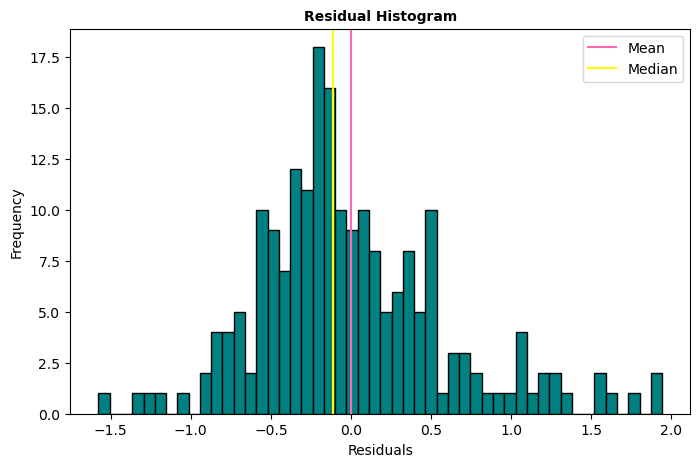


Shapiro Wilk Results:
p-value of 0.0 is less than 0.05, therefore we can reject the null hypothesis and assume the alternate hypothesis holds true
                  


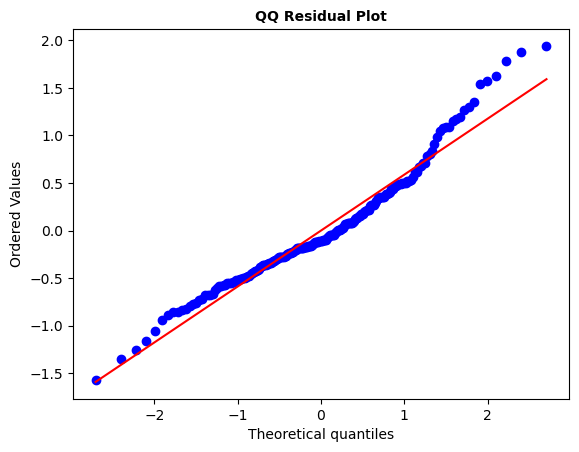

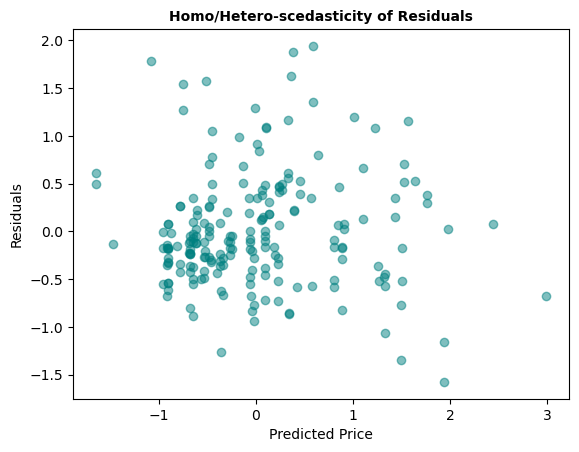

In [48]:
my_linear_builder.assess_accuracy(my_final_model)

## Appendix
----

In [19]:
## Warning on VIF calculation regrading /0 
# Assumed it may be due to collinearity between paies of x vars but on testing this was not true 
# In the end I believe the error is regrading my constant as the VIF for const is 0 - I am not sure why
# Solution: settled for ignoring vif const as this the constant would always be the same and so won't affect the multi-collinearity see the .py file for more info
my_linear_builder.X.corr()[my_linear_builder.X.corr() >= 0.90].stack()


wheelbase               wheelbase                 1.0
carlength               carlength                 1.0
carwidth                carwidth                  1.0
carheight               carheight                 1.0
curbweight              curbweight                1.0
boreratio               boreratio                 1.0
stroke                  stroke                    1.0
compressionratio        compressionratio          1.0
peakrpm                 peakrpm                   1.0
citympg                 citympg                   1.0
enginesize_transformed  enginesize_transformed    1.0
horsepower_transformed  horsepower_transformed    1.0
symboling_-1            symboling_-1              1.0
symboling_-2            symboling_-2              1.0
symboling_0             symboling_0               1.0
symboling_1             symboling_1               1.0
symboling_2             symboling_2               1.0
symboling_3             symboling_3               1.0
is_turbo                is_t

In [20]:
my_linear_builder.X.corr()[my_linear_builder.X.corr() <= -0.90].stack()

Series([], dtype: float64)

In [18]:
my_linear_builder.x_modelling(to_drop= ['highwaympg', 'fuelsystem_idi','is_two_cylinder', 'is_gas','is_rear_wheel_drive'])

,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,peakrpm,citympg,...,is_five_cylinder,is_four_cylinder,is_six_cylinder,is_three_cylinder,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,1,0,0,0,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.519071,-1.839377,-0.288349,-0.262960,-0.646553,...,0,1,0,0,0,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,-2.404880,0.685946,-0.288349,-0.262960,-0.953012,...,0,0,1,0,0,0,0,0,1,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.517266,0.462183,-0.035973,0.787855,-0.186865,...,0,1,0,0,0,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,-0.517266,0.462183,-0.540725,0.787855,-1.106241,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.728239,0.763241,1.666445,-0.336970,-0.162161,0.577692,-0.340094,...,0,1,0,0,0,0,0,0,1,0
201,1.721873,1.198549,1.351515,0.728239,0.949992,1.666445,-0.336970,-0.364062,0.367529,-0.953012,...,0,1,0,0,0,0,0,0,1,0
202,1.721873,1.198549,1.398245,0.728239,0.878757,0.926204,-1.232021,-0.338824,0.787855,-1.106241,...,0,0,1,0,0,0,0,0,1,0
203,1.721873,1.198549,1.398245,0.728239,1.273437,-1.183483,0.462183,3.244916,-0.683286,0.119594,...,0,0,1,0,0,0,0,0,0,0
